In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
quant = pd.read_csv("ravdess_quantitative.csv")
categ = pd.read_csv("ravdess_categorical.csv")
categ.actor.loc[categ.actor=="GNAA"] = np.nan
categ.isna().sum()

known_actors_filter = np.logical_not(categ.actor.isna())
known_quant = quant.loc[known_actors_filter]
known_categ = categ.loc[known_actors_filter]

## Tree

### GridSearch

In [3]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, cohen_kappa_score, balanced_accuracy_score
kappa_scorer = make_scorer(cohen_kappa_score)
"""
def tree_feature_gridsearch(feature):
    X = known_quant.values
    y = known_categ[feature].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    pca = PCA()
    dec_tree = tree.DecisionTreeClassifier()

    n_components = list(range(4, 18))
    criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]
    min_samples_split = [2, 6, 10]

    parameters = dict(  pca__n_components=n_components,
                        dec_tree__criterion=criterion,
                        dec_tree__max_depth=max_depth,
                        dec_tree__min_samples_split=min_samples_split)

    pipe = Pipeline(steps=[    ('std_slc', scaler),
                            ('pca', pca),
                            ('dec_tree', dec_tree)])
    clf_GS = GridSearchCV(pipe, parameters, scoring=kappa_scorer)
    clf_GS.fit(X_train, y_train)
    optimal_results = clf_GS.best_estimator_.get_params()
    optimal_results["kappa"] = clf_GS.score(X_test, y_test)
    optimal_results["bal_accuracy"] = balanced_accuracy_score(y_test, clf_GS.predict(X_test))
    return optimal_results

dtree_gs_df = pd.DataFrame()
for feature in categ.columns:
    print(feature)
    results = tree_feature_gridsearch(feature)
    row={k:results[k] for k in ["pca__n_components", "dec_tree__criterion","dec_tree__max_depth","dec_tree__min_samples_split", "kappa", "bal_accuracy"]}
    row["feature"] = feature
    row = pd.DataFrame(row, index = [0])
    dtree_gs_df = pd.concat([dtree_gs_df, row], ignore_index=True)

dtree_gs_df.to_csv("tree_optimal_results.csv")
"""
dtree_gs_df = pd.read_csv("tree_optimal_results.csv")

In [13]:
display(dtree_gs_df.sort_values("kappa"))

,Unnamed: 0,pca__n_components,dec_tree__criterion,dec_tree__max_depth,dec_tree__min_samples_split,kappa,bal_accuracy,feature
4,4,14,entropy,10,10,-0.109963,0.445360,repetition
1,1,14,entropy,8,2,0.171279,0.279910,emotion
3,3,17,entropy,10,10,0.194371,0.597478,statement
5,5,13,gini,12,2,0.293342,0.321115,actor
2,2,17,entropy,4,6,0.409540,0.704633,emotional_intensity
6,6,13,entropy,12,2,0.726058,0.862924,sex
0,0,8,gini,6,2,0.739955,0.865932,vocal_channel


## Bayes

### Grid search

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, cohen_kappa_score
kappa_scorer = make_scorer(cohen_kappa_score)
"""
def nbc_feature_gridsearch(feature):
    X = known_quant.values
    y = known_categ[feature].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    pca = PCA()
    nbcclf = GaussianNB()

    n_components = list(range(1, len(quant.columns)+1))

    parameters = dict(pca__n_components=n_components)

    pipe = Pipeline(steps=[ ('std_slc', scaler),
                            ('pca', pca),
                            ('nbcclf', nbcclf)])
    clf_GS = GridSearchCV(pipe, parameters, scoring=kappa_scorer)
    clf_GS.fit(X_train, y_train)
    optimal_results = clf_GS.best_estimator_.get_params()
    optimal_results["kappa"] = clf_GS.score(X_test, y_test)
    optimal_results["bal_accuracy"] = balanced_accuracy_score(y_test, clf_GS.predict(X_test))

    return optimal_results

nbc_gs_df = pd.DataFrame()
for feature in categ.columns:
    print(feature)
    results = nbc_feature_gridsearch(feature)
    row={k:results[k] for k in ["pca__n_components", "kappa", "bal_accuracy"]}
    row["feature"] = feature
    row = pd.DataFrame(row, index = [0])
    nbc_gs_df = pd.concat([nbc_gs_df, row], ignore_index=True)

nbc_gs_df.to_csv("nbc_optimal_results.csv")
"""
nbc_gs_df = pd.read_csv("nbc_optimal_results.csv")

In [14]:
display(nbc_gs_df.sort_values("kappa"))

,Unnamed: 0,pca__n_components,kappa,bal_accuracy,feature
4,4,9,-0.035760,0.482009,repetition
1,1,16,0.269016,0.371528,emotion
3,3,16,0.335029,0.667072,statement
2,2,4,0.463694,0.728584,emotional_intensity
5,5,18,0.534872,0.550949,actor
0,0,18,0.842203,0.915985,vocal_channel
6,6,14,0.870769,0.935699,sex


## KNN

### Grid search

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, cohen_kappa_score
kappa_scorer = make_scorer(cohen_kappa_score)
"""
def knn_feature_gridsearch(feature):
    X = known_quant.values
    y = known_categ[feature].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    pca = PCA()
    knnclf = KNeighborsClassifier()

    n_components = list(range(11, len(quant.columns)+1))
    weights = ['distance']
    k = list(range(1,15))
    p = [1,2,np.inf]

    parameters = dict(  pca__n_components=n_components,
                        knnclf__weights=weights,
                        knnclf__n_neighbors=k,
                        knnclf__p=p)

    pipe = Pipeline(steps=[ ('std_slc', scaler),
                            ('pca', pca),
                            ('knnclf', knnclf)])
    clf_GS = GridSearchCV(pipe, parameters, scoring=kappa_scorer)
    clf_GS.fit(X_train, y_train)
    optimal_results = clf_GS.best_estimator_.get_params()
    optimal_results["kappa"] = clf_GS.score(X_test, y_test)
    optimal_results["bal_accuracy"] = balanced_accuracy_score(y_test, clf_GS.predict(X_test))
    return optimal_results

knn_gs_df = pd.DataFrame()
for feature in categ.columns:
    print(feature)
    results = knn_feature_gridsearch(feature)
    row={k:results[k] for k in ["pca__n_components", "knnclf__weights","knnclf__p","kappa", "bal_accuracy"]}
    row["feature"] = feature
    row = pd.DataFrame(row, index = [0])
    knn_gs_df = pd.concat([knn_gs_df, row], ignore_index=True)

knn_gs_df.to_csv("knn_optimal_results.csv")
"""
knn_gs_df = pd.read_csv("knn_optimal_results.csv")


In [15]:
display(knn_gs_df.sort_values("kappa"))

,Unnamed: 0,pca__n_components,knnclf__weights,knnclf__p,kappa,bal_accuracy,feature
4,4,13,distance,inf,-0.056958,0.471509,repetition
3,3,18,distance,1.0,0.224772,0.612725,statement
1,1,18,distance,2.0,0.315344,0.404130,emotion
2,2,11,distance,inf,0.405650,0.698747,emotional_intensity
5,5,18,distance,1.0,0.546703,0.559490,actor
6,6,18,distance,2.0,0.870732,0.935555,sex
0,0,11,distance,2.0,0.922060,0.961030,vocal_channel


## Plots

In [9]:
from matplotlib import rcParams
rcParams["figure.autolayout"] = False

## Best Values

In [17]:
optimal_df = pd.DataFrame(columns=["classifier", "feature", "kappa"])
for clfdf, clfname in zip([dtree_gs_df, knn_gs_df, nbc_gs_df], ["dt", "knn", "nbc"]):
    add = dict(feature = clfdf.feature, kappa=clfdf.kappa, classifier=[clfname]*len(clfdf))
    add = pd.DataFrame(add, index = range(len(clfdf)))
    optimal_df=pd.concat([optimal_df, add], ignore_index=True)
display(optimal_df.sort_values("kappa"))

,classifier,feature,kappa
4,dt,repetition,-0.109963
11,knn,repetition,-0.056958
18,nbc,repetition,-0.035760
1,dt,emotion,0.171279
3,dt,statement,0.194371
10,knn,statement,0.224772
15,nbc,emotion,0.269016
5,dt,actor,0.293342
8,knn,emotion,0.315344
17,nbc,statement,0.335029


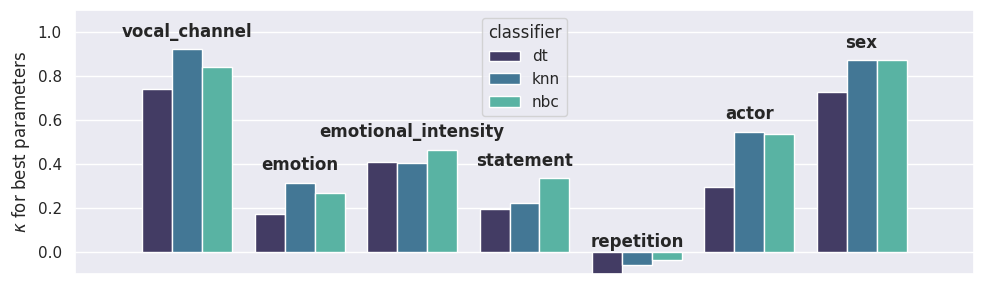

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(data=optimal_df, x="feature",y="kappa",  hue="classifier", palette="mako")
plt.xlabel("")
plt.ylabel("$\kappa$ for best parameters")
plt.xticks([])
fig.tight_layout()

for i,label in enumerate(categ.columns):
    y = optimal_df.loc[optimal_df.feature == label].kappa.max()
    ax.text(i, y + 0.08, label, ha="center", va="center", fontweight="bold",  rotation=0)
    # for j, (classifier, par, col) in enumerate(zip(["KNN", "decision tree"], ["k", "depth"], ["r", "g"])):
    #     if label != "repetition":
    #         best_par = optimal_df.loc[(optimal_df.feature==label)&(optimal_df.classifier==classifier)].best_par.values[0]
    #         ax.text(i-j/4  , 0.02, f"{int(best_par)}", ha="center", rotation=0, color=col, fontweight="bold")
ax.set_ylim(-0.1,1.1)
ax.set_xlim(-1,7)

ax.set_yticks([0, 0.2,0.4,0.6,0.8,1.0])
# ax.text(3.3,-0.15, "best depth",ha="center" ,color="g", fontweight="bold")
# ax.text(3.3,-0.25, "best k", ha="center",color="r", fontweight="bold")
fig.savefig("images/comparison_optimal.pdf")

## Confusion matrix

### Actor

In [24]:
known_categ.actor = known_categ.actor.apply(float).apply(int)

actor_sex = {}
for act, sex in zip(known_categ.actor,  known_categ.sex.values):
    actor_sex[act] = sex

## Encoding dictionary to order stuff
actor_encoder = {}
c = 0
for male in np.sort(np.unique(known_categ[known_categ.sex=="M"].actor)):
    actor_encoder[male] = c 
    c+=1
for female in np.sort(np.unique(known_categ[known_categ.sex=="F"].actor)):
    actor_encoder[female] = c 
    c+=1

actor_decoder = {value:key for key, value in actor_encoder.items()}
print(actor_encoder)

{1: 0, 3: 1, 5: 2, 7: 3, 9: 4, 11: 5, 13: 6, 15: 7, 17: 8, 19: 9, 21: 10, 23: 11, 2: 12, 4: 13, 6: 14, 8: 15, 10: 16, 12: 17, 14: 18, 16: 19, 18: 20, 20: 21, 22: 22, 24: 23}


/tmp/ipykernel_7098/3255762443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_categ.actor = known_categ.actor.apply(float).apply(int)


In [25]:
## Select best estimator from optimals
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
reducer = PCA(n_components=18)
subclf = KNeighborsClassifier(weights="distance", p=1.0)
clf = make_pipeline(scaler, reducer, subclf)

X = known_quant.values
y = known_categ.actor.map(actor_encoder).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=18)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(p=1.0, weights='distance'))])

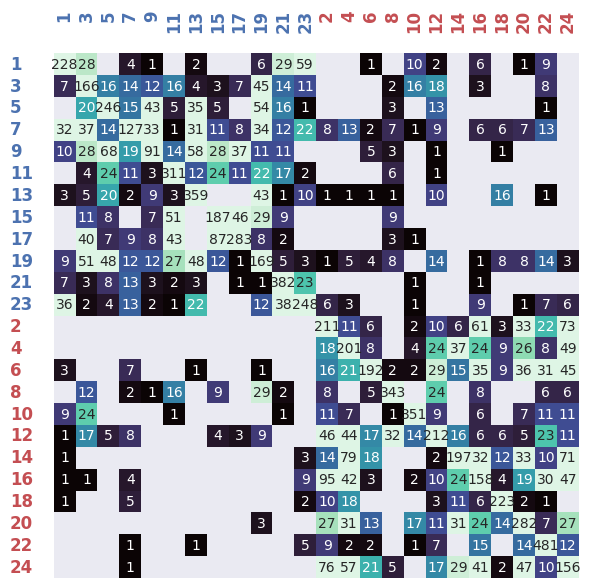

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))

N = len(np.unique(categ[known_actors_filter].actor))

cfm = np.zeros((N,N))

for k in range(20):
    Xtra, Xte, ytra, yte = train_test_split(X, y, test_size=0.4, random_state=2*k)
    clf.fit(Xtra, ytra)
    predicted = clf.predict(Xte)
    cfm += confusion_matrix(yte, predicted)
    for i in range(len(actor_encoder)): 
        acc_row = dict()

        is_actor_i = (yte == i)
        is_classified_as_actor_i = (predicted == i) 
        acc_row["actor"] = actor_encoder[i]
        acc_row["true_positives"] = np.sum(is_actor_i & is_classified_as_actor_i)
        acc_row["false_positives"] = np.sum(np.logical_not(is_actor_i) & is_classified_as_actor_i)
        acc_row["true_negatives"] = np.sum(np.logical_not(is_actor_i) & np.logical_not(is_classified_as_actor_i))
        acc_row["false_negatives"] = np.sum(is_actor_i & np.logical_not(is_classified_as_actor_i ))
        acc_row["precision"]= acc_row["true_positives"]/(acc_row["true_positives"]+acc_row["false_positives"])*100
        acc_row["recall"]= acc_row["true_positives"]/(acc_row["true_positives"]+acc_row["false_negatives"])*100
        actor_accuracy_df = pd.concat([actor_accuracy_df, pd.DataFrame(acc_row, index=[0])], ignore_index=True)
cfm = cfm.astype(int)
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(cfm,cmap=cmap,ax=ax, annot=True,annot_kws=dict(size=10), fmt="d", vmax=30,cbar=False, cbar_kws =dict(shrink=0.75),mask=(cfm==0))
for i in range(len(actor_encoder.keys())):
    if actor_sex[actor_encoder[i]] == "M":
        color="b"
    else:
        color="r"
    ax.text(i + 0.5 , -2, actor_encoder[i], va="top", ha="center", rotation=90, fontweight="bold", color=color);
    ax.text(-2, i+0.5, actor_encoder[i], ha="left", va="center",rotation=0, fontweight="bold", color=color);
ax.set_aspect("equal")
ax.set_xticks(range(1,25),labels=[]);
ax.set_yticks(range(1,25), labels=[]);
fig.tight_layout()
fig.savefig("images/actor_cfm.pdf")

In [ ]:
data = actor_accuracy_df.sort_values(by=["precision","recall"]).reset_index()
display(data)


,index,actor,precision,recall,true_positives,false_positives,true_negatives,false_negatives
0,124,9,15.384615,15.384615,2.0,11.0,502.0,11.0
1,479,24,17.241379,19.230769,5.0,24.0,476.0,21.0
2,119,24,19.047619,20.000000,4.0,17.0,489.0,16.0
3,148,9,20.000000,15.789474,3.0,12.0,495.0,16.0
4,465,19,20.833333,29.411765,5.0,19.0,490.0,12.0
...,...,...,...,...,...,...,...,...
475,351,8,92.857143,72.222222,13.0,1.0,507.0,5.0
476,376,10,94.736842,78.260870,18.0,1.0,502.0,5.0
477,375,8,95.454545,84.000000,21.0,1.0,500.0,4.0
478,184,10,95.652174,75.862069,22.0,1.0,496.0,7.0


In [ ]:
order = [2*j + 1 for j in range(12)] + [2*(j+1) for j in range(12)]

In [ ]:
display(actor_accuracy_df.groupby("actor").mean().sort_values("precision").index)

Int64Index([24, 19, 16,  3,  2,  4,  9,  7, 12, 15,  5, 14, 20, 13, 23, 11,  6,
             1, 22, 21, 17, 18,  8, 10],
           dtype='int64', name='actor')

<AxesSubplot: xlabel='actor', ylabel='precision'>

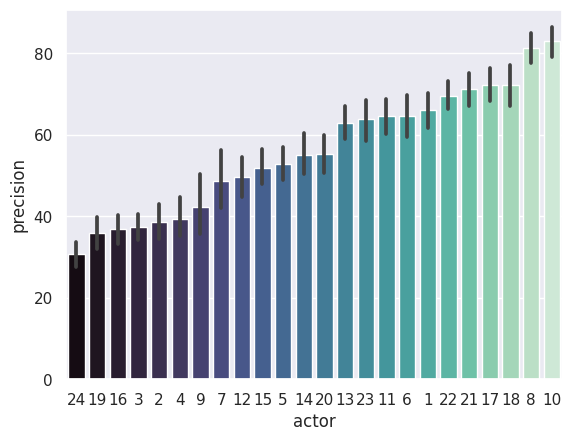

In [ ]:
sns.barplot(data=data,  x="actor", y="precision", order=actor_accuracy_df.groupby("actor").mean().sort_values("precision").index,  palette="mako", dodge=False)

<AxesSubplot: xlabel='actor', ylabel='recall'>

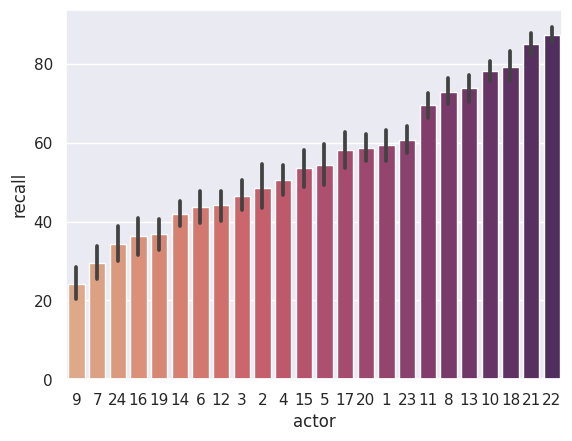

In [ ]:
sns.barplot(data=data,  x="actor", y="recall" , order=actor_accuracy_df.groupby("actor").mean().sort_values("recall").index, palette="flare", dodge=False)


## Multiclass ROC

In [ ]:

emotion_roc_df = pd.DataFrame(columns = ["k", "actor",  "TP", "FP", "TN", "FN", "TPR", "FPR"])
for k in range(1,100):
    for emotion in np.unique(categ.emotion):
        clf = make_pipeline(scaler, tree.DecisionTreeClassifier(max_depth=k))
        X = quant.values
        y = (categ.emotion== emotion)
        Xtra, Xte, ytra, yte = train_test_split(X, y, test_size=0.4, random_state=1)

        clf.fit(Xtra, ytra)

        predicted = clf.predict(Xte)

        row = dict()
        cfm = confusion_matrix(yte, predicted)
        row["FP"] = cfm[0, 1]
        row["FN"] = cfm[1,0]
        row["TP"] = cfm[1,1]
        row["TN"] = cfm[0,0]

        row["TPR"] = row["TP"]/(row["TP"]+row["FN"])
        row["FPR"] = row["FP"]/(row["FP"]+row["TN"])

        row["k"] = k
        row["emotion"] = emotion
        emotion_roc_df = pd.concat([emotion_roc_df, pd.DataFrame(row, index= [0])], ignore_index= True)

<AxesSubplot: xlabel='FPR', ylabel='TPR'>

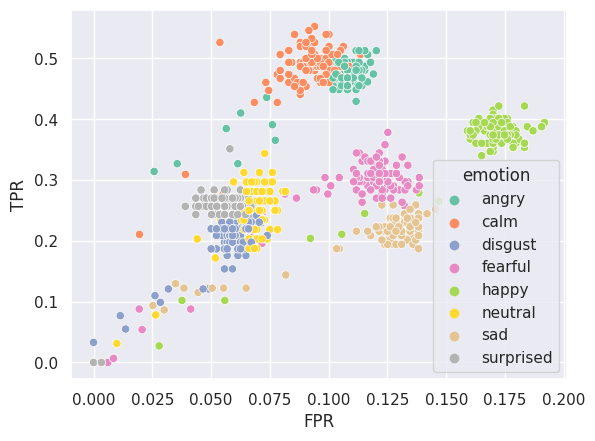

In [ ]:
sns.scatterplot(data=emotion_roc_df, x="FPR", y="TPR", hue="emotion", palette="Set2")

In [ ]:
actor_roc_df = pd.DataFrame(columns = ["k", "actor",  "TP", "FP", "TN", "FN", "TPR", "FPR"])
X = quant[known_actors_filter].values
Y = categ.loc[known_actors_filter].actor.apply(float).apply(int)
for k in range(1,100):
    for actor in np.unique(Y):
        clf = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=k, weights="distance"))
        y= (Y==actor)
        Xtra, Xte, ytra, yte = train_test_split(X, y, test_size=0.4, random_state=1)

        clf.fit(Xtra, ytra)

        predicted = clf.predict(Xte)

        row = dict()
        cfm = confusion_matrix(yte, predicted)
        row["FP"] = cfm[0, 1]
        row["FN"] = cfm[1,0]
        row["TP"] = cfm[1,1]
        row["TN"] = cfm[0,0]

        row["TPR"] = row["TP"]/(row["TP"]+row["FN"])
        row["FPR"] = row["FP"]/(row["FP"]+row["TN"])

        row["k"] = k
        row["actor"] = actor
        actor_roc_df = pd.concat([actor_roc_df, pd.DataFrame(row, index= [0])], ignore_index= True)

<AxesSubplot: xlabel='k', ylabel='TPR'>

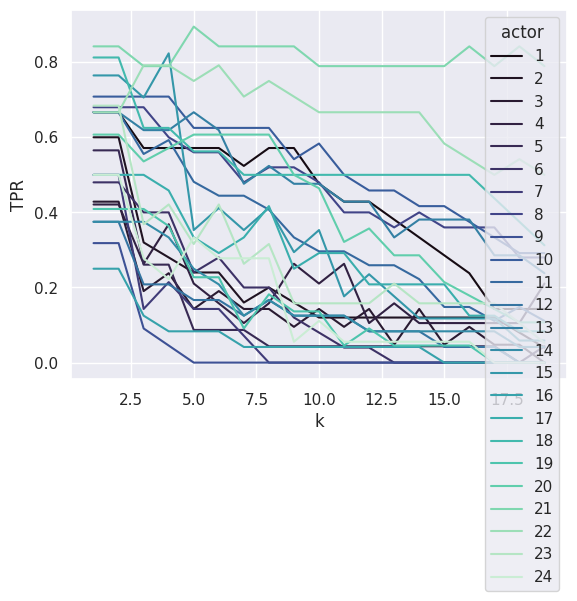

In [ ]:
sns.lineplot(data=actor_roc_df[actor_roc_df.k < 20], x="k", y="TPR", hue="actor", palette=sns.color_palette("mako", 24))